<a href="https://colab.research.google.com/github/waveology/aire/blob/main/contaminacion_meteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!ls
#!git clone https://github.com/waveology/aire.git


aire   driver.ipynb  LICENSE	    __pycache__
datos  lee_datos.py  pruebas.ipynb  README.md


In [2]:
%cd aire

/content/aire


In [3]:
%matplotlib inline

import lee_datos
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
yearlist = ('2020','2021','2022')
codigo_magnitud = 83
codigo_estacion=28067001

In [5]:
df = []
for year in yearlist :
    
    d, magnitud, unidades,estacion = lee_datos.meteo(
             'datos/meteo/%s.csv' % year,
              codigo_magnitud=codigo_magnitud, 
              codigo_estacion=codigo_estacion) 
    df.append(d)


 -Info: encontrados datos de 366 días
 -Info: encontrados datos de 365 días
 -Info: encontrados datos de 365 días


Text(0.5, 1.0, 'GUADALIX DE LA SIERRA     -     Temperatura  (ºC)')

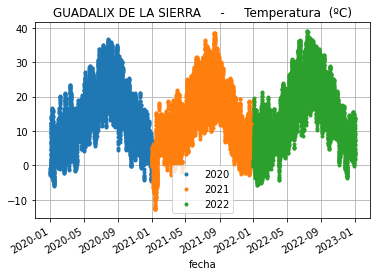

In [6]:
# Series temporales
# ----------------------
fig,ax = plt.subplots()
for i in range(len(yearlist)) :    
    df[i].plot(x='fecha',y='valor',
          marker='o',ms=3,lw=0,grid=True,
          label=yearlist[i],title='valor',ax=ax)
ax.legend()
ax.set_title('%s     -     %s  (%s)' % (estacion,magnitud,unidades))


Text(0.5, 1.0, 'GUADALIX DE LA SIERRA     -     Temperatura  (ºC)')

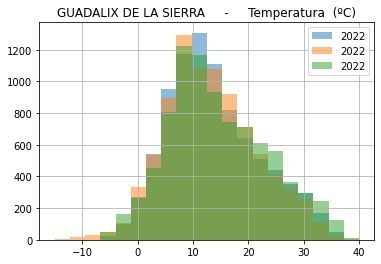

In [7]:
fig,ax = plt.subplots()
for i in range(len(yearlist)) :    
    df[i].hist(column='valor',bins=20,ax=ax,range=(-15,40),
               alpha=0.5,label=year)
ax.legend()
ax.set_title('%s     -     %s  (%s)' % (estacion,magnitud,unidades))


Text(0.5, 0.98, 'GUADALIX DE LA SIERRA     -     Temperatura  (ºC)')

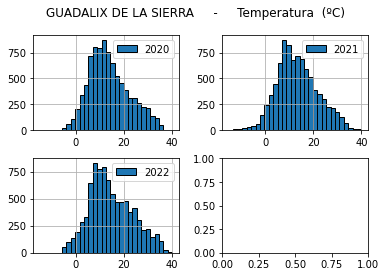

In [8]:
fig,ax = plt.subplots(2,2)
fax = ax.ravel()
for i in range(len(yearlist)) :    
    df[i].hist(column='valor',bins=30,ax=fax[i],
                label=yearlist[i],range=(-15,40),
                density=False,log=False,edgecolor='black')
    fax[i].legend()
    fax[i].set_title(None)
fig.suptitle('%s     -     %s  (%s)' % (estacion,magnitud,unidades))


In [9]:
print('Año1  Año2 media_año1 media_año2 mediana_año1 mediana_año2 p-valor')
print("------------------------------------------------------------------")
for i in range(len(yearlist)) :
    for j in range(len(yearlist)) :    
        
        if i >= j : continue
        
        st,pvalue = stats.mannwhitneyu(df[i]['valor'],df[j]['valor'])
        
        mean1   = df[i]['valor'].mean()
        mean2   = df[j]['valor'].mean()
        median1 = df[i]['valor'].median()
        median2 = df[j]['valor'].median()
        
        print('%s %s %.4f %.4f %.4f %.4f %.5f' 
              % (yearlist[i],yearlist[j],mean1,mean2,median1,median2,pvalue))





Año1  Año2 media_año1 media_año2 mediana_año1 mediana_año2 p-valor
------------------------------------------------------------------
2020 2021 13.7505 13.3046 12.5000 12.5000 0.02035
2020 2022 13.7505 14.5360 12.5000 13.1000 0.00000
2021 2022 13.3046 14.5360 12.5000 13.1000 0.00000
